In [5]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import figure

%load_ext autoreload
%autoreload 2

sys.path.append("../library/")

from define_networks import *
from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Neural networks approximating linear operators

This notebook approximates the linear operator from the **Fokker-Plank equation** using data obtain by using *FEniCS*

In [6]:
## parameters
random_state = 1

# dimension of the problem
n_dim = 50
n_steps_epoch = 100
# training samples
n_samples_train = 10000
n_per_axis = 250
n_samples_test = 100

# neural network parameters
NET_ACTIVATIONS = tf.nn.elu
NET_LAYERS = 3
NET_NEURONS_PER_LAYER = 8

# NET_LEARNING_RATE = 1e-2
NET_EPOCHS = 200
NET_BATCH_SIZE = 64
# NET_DECAY_RATE = NET_LEARNING_RATE/NET_EPOCHS


## Analytical Solution data

### Generate data


In [17]:
U, Ut = LoadFEniCS_andAugmentData()
# define network model

dim_in = 5
dim_out = 1
network = ModelBuilder.define_feedforward_model(activation=NET_ACTIVATIONS,
                                             name="linearoperatorsolver",
                                             n_layers=4,
                                             n_dim_per_layer=10,
                                             n_input_dimensions=dim_in,
                                             n_output_dimensions=dim_out)


network.compile(optimizer="Adam", loss="mse")


callbacks = [LossAndErrorPrintingCallback()]
historian = network.fit(U, Ut,
                      validation_split=.1, epochs= 400, verbose=0, batch_size=NET_BATCH_SIZE,
                      callbacks=callbacks)

The average loss for epoch 399 is 0.0000012905 

In [19]:
initial_cond = shape_fp(fenics_fp0)
num_t = 10

U_predicted_fp = np.zeros([401, num_t])
U_predicted_fp[:,0] =  fenics_fp0[:,1]
#print(U_predicted_fp.shape)
t = 0
for t in range(num_t-1):
    # Reshaping to use the operator one time
    #print("gaussian pre shape= ", U_gaussian[:,:,t].shape) 
    U_predicted_fp_test = shape_fpp(U_predicted_fp[:,t])
    #print(U_predicted_fp_test.shape)

    #print("gaussian_test shape= ", U_gaussian_test.shape) 
    #predicting Ut
    Ut_predicted_predicted = network(U_predicted_fp_test)
    #print(Ut_predicted_predicted.shape)

    #print("Ut_predicted shape", Ut_gaussian_predicted.shape)

    #Ut_predicted_predicted = shape_fpp(Ut_predicted_predicted[:,0])
    #print(Ut_predicted_predicted.shape)

    # Update the value of U
    #var[t+1] = Ut_gaussian_predicted
    U_predicted_fp[:,t+1] = U_predicted_fp[:,t] - Ut_predicted_predicted[:,0]

print("U_gaussian final shape:", U_predicted_fp.shape)

U_gaussian final shape: (401, 10)


(401, 10)


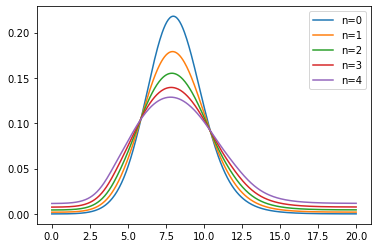

In [26]:
print(U_predicted_fp.shape)
plt.plot(x,U_predicted_fp[:,0])
plt.plot(x, U_predicted_fp[:,1])
plt.plot(x, U_predicted_fp[:,2])
plt.plot(x, U_predicted_fp[:,3])
plt.plot(x, U_predicted_fp[:,4])

plt.legend(['n=0','n=1','n=2','n=3','n=4'])

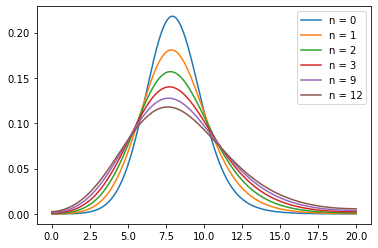

In [34]:
xf= np.linspace(0,20,401)

plt.plot(xf,fenics_fp0[:,1])
plt.plot(xf,fenics_fp1[:,1])
plt.plot(xf,fenics_fp2[:,1])
plt.plot(xf,fenics_fp3[:,1])
plt.plot(xf,fenics_fp9[:,1])
plt.plot(xf,fenics_fp12[:,1])





plt.legend(['n = 0','n = 1','n = 2','n = 3','n = 9','n = 12'])

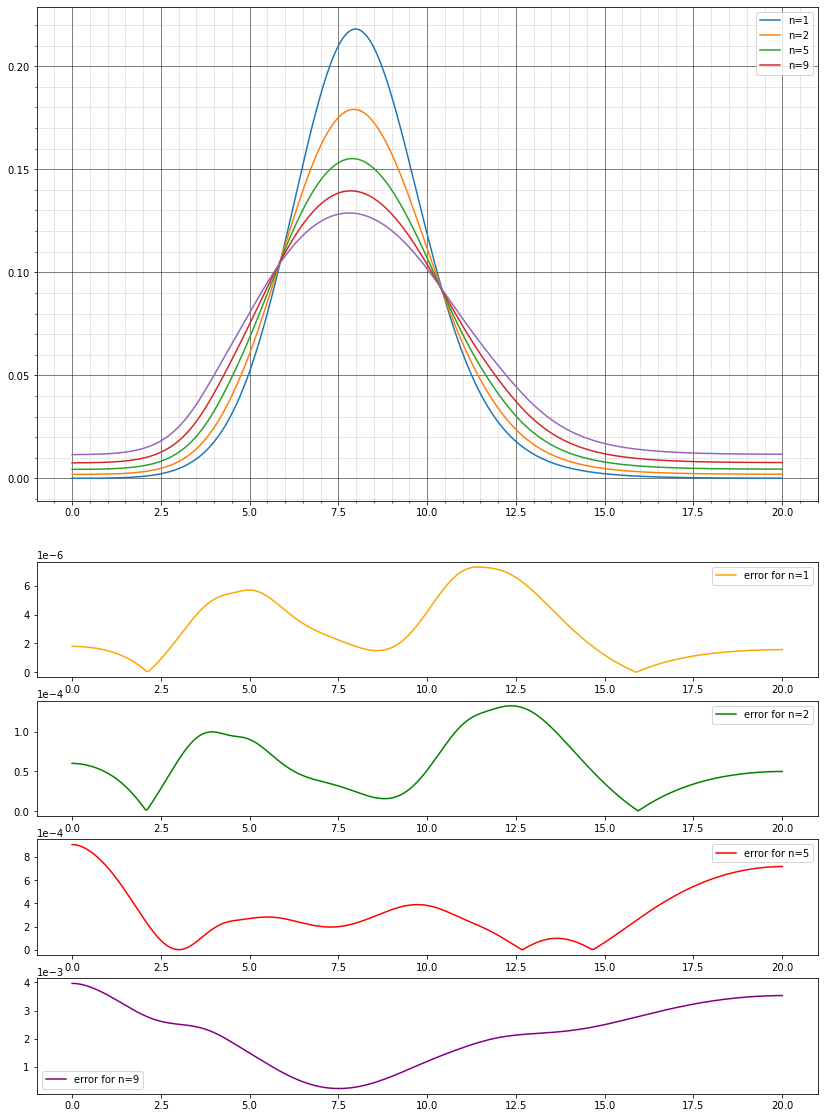

In [30]:
xl = np.linspace(0,20,400)
plt.figure(figsize=(14, 20))
plt.title('Fokker Plank with the approximated operator')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1 = plt.subplot(2,1,1)

ex1 = plt.subplot(8,1,5)
ex2 = plt.subplot(8,1,6)
ex3 = plt.subplot(8,1,7)
ex4 = plt.subplot(8,1,8)

ax1.plot(x,U_predicted_fp[:,0])
ax1.plot(x,U_predicted_fp[:,1])
ax1.plot(x,U_predicted_fp[:,2])
ax1.plot(x,U_predicted_fp[:,3])
ax1.plot(x,U_predicted_fp[:,4])

ax1.minorticks_on()
# Customize the major grid
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

ax1.legend(['n=1','n=2','n=5','n=9'])

ex1.plot(xl,np.abs(U_predicted_fp[0:400,1]-fenics_fp1[0:400,1]), 'orange')
ex1.legend(['error for n=1'])
ex1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


ex2.plot(xl,np.abs(U_predicted_fp[0:400,2]-fenics_fp2[0:400,1]), 'green')
ex2.legend(['error for n=2'])
ex2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


ex3.plot(xl,np.abs(U_predicted_fp[0:400,5]-fenics_fp5[0:400,1]),'red')
ex3.legend(['error for n=5'])
ex3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


ex4.plot(xl, np.abs(U_predicted_fp[0:400,9]-fenics_fp9[0:400,1]),'purple')
ex4.legend(['error for n=9'])
ex4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

